In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as sio
from xmitgcm import open_mdsdataset
import pandas as pd
import xarray as xr
from scipy import interpolate
from skimage import measure
from copy import deepcopy
import time

## Clim ssh

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


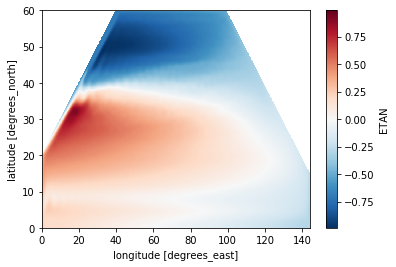

In [2]:
import numpy as np
import xarray as xr
import dask
from matplotlib import pyplot as plt
import matplotlib.colors
%matplotlib inline
from xmitgcm import open_mdsdataset

data_dir = '/swot/SUM01/tongya/cox/fine/run_quik_ex2/'

ds = open_mdsdataset(data_dir,prefix='etan_ave').chunk()

lon = ds.XC
lat = ds.YC

ssh = ds['ETAN'][70:100, :, :]
ssh = ssh.mean('time')
ssh = ssh.where(ssh != 0)

ssh.plot()

In [3]:
lc = 0
rc = 144
nc = 40
sc = 5
dir_ssh = '/swot/SUM01/tongya/RCLV/flt_2d/001/'
ds = open_mdsdataset(dir_ssh, prefix='Eta').chunk()
sla = ds.Eta - ssh
sla = sla.sel(XC=slice(lc, rc), YC=slice(sc, nc)) * 100
sla

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.DataArray (time: 91, YC: 350, XC: 1440)>
dask.array<shape=(91, 350, 1440), dtype=float32, chunksize=(1, 350, 1440)>
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 ... 143.65 143.75 143.85 143.95
  * YC       (YC) >f4 5.05 5.15 5.25 5.35 5.45 ... 39.55 39.65 39.75 39.85 39.95
    rA       (YC, XC) >f4 dask.array<shape=(350, 1440), chunksize=(350, 1440)>
    Depth    (YC, XC) >f4 dask.array<shape=(350, 1440), chunksize=(350, 1440)>
    iter     (time) int64 dask.array<shape=(91,), chunksize=(1,)>
  * time     (time) int64 0 96 192 288 384 480 ... 8160 8256 8352 8448 8544 8640

In [4]:
lc = 0
rc = 144
nc = 40
sc = 5
dir_ssh = '/swot/SUM01/tongya/RCLV/flt_2d/002/'
ds1 = open_mdsdataset(dir_ssh, prefix='Eta').chunk()
sla_ds1 = ds1.Eta - ssh
sla_ds1 = sla_ds1.sel(XC=slice(lc, rc), YC=slice(sc, nc)) * 100
sla_ds1

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.DataArray (time: 91, YC: 350, XC: 1440)>
dask.array<shape=(91, 350, 1440), dtype=float32, chunksize=(1, 350, 1440)>
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 ... 143.65 143.75 143.85 143.95
  * YC       (YC) >f4 5.05 5.15 5.25 5.35 5.45 ... 39.55 39.65 39.75 39.85 39.95
    rA       (YC, XC) >f4 dask.array<shape=(350, 1440), chunksize=(350, 1440)>
    Depth    (YC, XC) >f4 dask.array<shape=(350, 1440), chunksize=(350, 1440)>
    iter     (time) int64 dask.array<shape=(91,), chunksize=(1,)>
  * time     (time) int64 0 96 192 288 384 480 ... 8160 8256 8352 8448 8544 8640

In [5]:
lc = 0
rc = 144
nc = 40
sc = 5
dir_ssh = '/swot/SUM01/tongya/RCLV/flt_2d/003/'
ds2 = open_mdsdataset(dir_ssh, prefix='Eta').chunk()
sla_ds2 = ds2.Eta - ssh
sla_ds2 = sla_ds2.sel(XC=slice(lc, rc), YC=slice(sc, nc)) * 100
sla_ds2

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.DataArray (time: 91, YC: 350, XC: 1440)>
dask.array<shape=(91, 350, 1440), dtype=float32, chunksize=(1, 350, 1440)>
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 ... 143.65 143.75 143.85 143.95
  * YC       (YC) >f4 5.05 5.15 5.25 5.35 5.45 ... 39.55 39.65 39.75 39.85 39.95
    rA       (YC, XC) >f4 dask.array<shape=(350, 1440), chunksize=(350, 1440)>
    Depth    (YC, XC) >f4 dask.array<shape=(350, 1440), chunksize=(350, 1440)>
    iter     (time) int64 dask.array<shape=(91,), chunksize=(1,)>
  * time     (time) int64 0 96 192 288 384 480 ... 8160 8256 8352 8448 8544 8640

In [6]:
data_case1 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/Figs/data_case7.npz')
pxin1 = data_case1['arr_0']
pyin1 = data_case1['arr_1']
pxout1 = data_case1['arr_2']
pyout1 = data_case1['arr_3']
boun_x1 = data_case1['arr_4']
boun_y1 = data_case1['arr_5']
rclv_xx1 = data_case1['arr_6']
rclv_yy1 = data_case1['arr_7']
num11 = data_case1['arr_8']
num21 = data_case1['arr_9']
sla1 = data_case1['arr_10']
cenx1 = data_case1['arr_11']
ceny1 = data_case1['arr_12']

In [7]:
data_case2 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/Figs/data_case5.npz')
pxin2 = data_case2['arr_0']
pyin2 = data_case2['arr_1']
pxout2 = data_case2['arr_2']
pyout2 = data_case2['arr_3']
boun_x2 = data_case2['arr_4']
boun_y2 = data_case2['arr_5']
rclv_xx2 = data_case2['arr_6']
rclv_yy2 = data_case2['arr_7']
num12 = data_case2['arr_8']
num22 = data_case2['arr_9']
sla2 = data_case2['arr_10']
cenx2 = data_case2['arr_11']
ceny2 = data_case2['arr_12']

In [8]:
data_case3 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/Figs/data_case2.npz')
pxin3 = data_case3['arr_0']
pyin3 = data_case3['arr_1']
pxout3 = data_case3['arr_2']
pyout3 = data_case3['arr_3']
boun_x3 = data_case3['arr_4']
boun_y3 = data_case3['arr_5']
rclv_xx3 = data_case3['arr_6']
rclv_yy3 = data_case3['arr_7']
num13 = data_case3['arr_8']
num23 = data_case3['arr_9']
sla3 = data_case3['arr_10']
cenx3 = data_case3['arr_11']
ceny3 = data_case3['arr_12']

In [9]:
data_case4 = np.load('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/Figs/data_case3.npz')
pxin4 = data_case4['arr_0']
pyin4 = data_case4['arr_1']
pxout4 = data_case4['arr_2']
pyout4 = data_case4['arr_3']
boun_x4 = data_case4['arr_4']
boun_y4 = data_case4['arr_5']
rclv_xx4 = data_case4['arr_6']
rclv_yy4 = data_case4['arr_7']
num14 = data_case4['arr_8']
num24 = data_case4['arr_9']
sla4 = data_case4['arr_10']
cenx4 = data_case4['arr_11']
ceny4 = data_case4['arr_12']

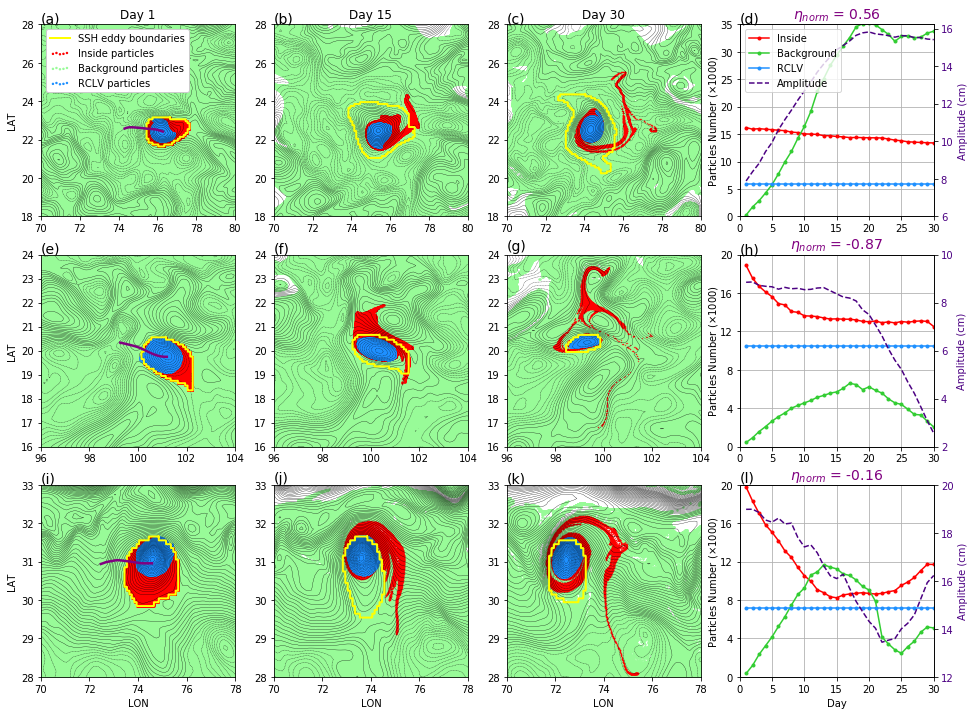

In [10]:
fig = plt.figure(figsize=(16, 12))

ax1 = plt.subplot(3, 4, 1)

hl1 = plt.plot(boun_x1[0], boun_y1[0], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout1[0], pyout1[0], s=2, color='palegreen')
hl3 = plt.scatter(pxin1[0], pyin1[0], s=2, color='red')
hl4 = plt.scatter(rclv_xx1[0], rclv_yy1[0], s=2, color='dodgerblue')
plt.contour(sla_ds2.XC, sla_ds2.YC, sla_ds2[0, :, :], np.arange(-20, 20, 1), colors='k', linewidths=0.3)
plt.plot(cenx1, ceny1, color='purple', linewidth=2.5)

plt.title('Day 1')
plt.xlim(70, 80)
plt.ylim(18, 28)
legend = plt.legend([hl1[0], hl3, hl2, hl4], ('SSH eddy boundaries', 'Inside particles', 'Background particles', 'RCLV particles'), scatterpoints=5, loc='upper left', framealpha=1)
legend.get_frame().set_facecolor('w')
plt.ylabel('LAT')
plt.text(70, 28.1, '(a)', size=14)

ax1 = plt.subplot(3, 4, 2)

hl1 = plt.plot(boun_x1[1], boun_y1[1], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout1[1], pyout1[1], s=2, color='palegreen')
hl3 = plt.scatter(pxin1[1], pyin1[1], s=2, color='red')
hl4 = plt.scatter(rclv_xx1[1], rclv_yy1[1], s=2, color='dodgerblue')
plt.contour(sla_ds2.XC, sla_ds2.YC, sla_ds2[14, :, :], np.arange(-20, 20, 1), colors='k', linewidths=0.3)

plt.title('Day 15')
plt.xlim(70, 80)
plt.ylim(18, 28)
plt.text(70, 28.1, '(b)', size=14)


ax1 = plt.subplot(3, 4, 3)

hl1 = plt.plot(boun_x1[2], boun_y1[2], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout1[2], pyout1[2], s=2, color='palegreen')
hl3 = plt.scatter(pxin1[2], pyin1[2], s=0.1, color='red')
hl4 = plt.scatter(rclv_xx1[2], rclv_yy1[2], s=2, color='dodgerblue')
plt.contour(sla_ds2.XC, sla_ds2.YC, sla_ds2[29, :, :], np.arange(-20, 20, 1), colors='k', linewidths=0.3)

plt.title('Day 30')
plt.xlim(70, 80)
plt.ylim(18, 28)
plt.text(70, 28.1, '(c)', size=14)

# -----------

ax1 = plt.subplot(3, 4, 5)

hl1 = plt.plot(boun_x3[0], boun_y3[0], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout3[0], pyout3[0], s=2, color='palegreen')
hl3 = plt.scatter(pxin3[0], pyin3[0], s=2, color='red')
hl4 = plt.scatter(rclv_xx3[0], rclv_yy3[0], s=2, color='dodgerblue')
plt.contour(sla.XC, sla.YC, sla[0, :, :], np.arange(-30, 30, 1), colors='k', linewidths=0.3)
plt.plot(cenx3, ceny3, color='purple', linewidth=2.5)
plt.ylabel('LAT')
plt.xlim(96, 104)
plt.ylim(16, 24)
plt.text(96, 24.1, '(e)', size=14)

ax1 = plt.subplot(3, 4, 6)

hl1 = plt.plot(boun_x3[1], boun_y3[1], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout3[1], pyout3[1], s=2, color='palegreen')
hl3 = plt.scatter(pxin3[1], pyin3[1], s=2, color='red')
hl4 = plt.scatter(rclv_xx3[1], rclv_yy3[1], s=2, color='dodgerblue')
plt.contour(sla.XC, sla.YC, sla[14, :, :], np.arange(-30, 30, 1), colors='k', linewidths=0.3)
plt.xlim(96, 104)
plt.ylim(16, 24)
plt.text(96, 24.1, '(f)', size=14)

ax1 = plt.subplot(3, 4, 7)

hl1 = plt.plot(boun_x3[2], boun_y3[2], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout3[2], pyout3[2], s=2, color='palegreen')
hl3 = plt.scatter(pxin3[2], pyin3[2], s=0.1, color='red')
hl4 = plt.scatter(rclv_xx3[2], rclv_yy3[2], s=2, color='dodgerblue')
plt.contour(sla.XC, sla.YC, sla[29, :, :], np.arange(-40, 40, 1), colors='k', linewidths=0.3)

plt.xlim(96, 104)
plt.ylim(16, 24)
plt.text(96, 24.2, '(g)', size=14)


## ----------
ax1 = plt.subplot(3, 4, 9)

hl1 = plt.plot(boun_x4[0], boun_y4[0], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout4[0], pyout4[0], s=2, color='palegreen')
hl3 = plt.scatter(pxin4[0], pyin4[0], s=2, color='red')
hl4 = plt.scatter(rclv_xx4[0], rclv_yy4[0], s=2, color='dodgerblue')
plt.contour(sla.XC, sla.YC, sla[0, :, :], np.arange(-40, 40, 1), colors='k', linewidths=0.3)
plt.plot(cenx4, ceny4, color='purple', linewidth=2.5)
plt.ylabel('LAT')
plt.xlabel('LON')
plt.xlim(70, 78)
plt.ylim(28, 33)
plt.text(70, 33.06, '(i)', size=14)

ax1 = plt.subplot(3, 4, 10)

hl1 = plt.plot(boun_x4[1], boun_y4[1], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout4[1], pyout4[1], s=2, color='palegreen')
hl3 = plt.scatter(pxin4[1], pyin4[1], s=0.1, color='red')
hl4 = plt.scatter(rclv_xx4[1], rclv_yy4[1], s=2, color='dodgerblue')
plt.contour(sla.XC, sla.YC, sla[14, :, :], np.arange(-40, 40, 1), colors='k', linewidths=0.3)
plt.xlim(70, 78)
plt.ylim(28, 33)
plt.xlabel('LON')
plt.text(70, 33.07, '(j)', size=14)

ax1 = plt.subplot(3, 4, 11)

hl1 = plt.plot(boun_x4[2], boun_y4[2], linewidth=2, color='yellow')
hl2 = plt.scatter(pxout4[2], pyout4[2], s=2, color='palegreen')
hl3 = plt.scatter(pxin4[2], pyin4[2], s=0.1, color='red')
hl4 = plt.scatter(rclv_xx4[2], rclv_yy4[2], s=2, color='dodgerblue')
plt.contour(sla.XC, sla.YC, sla[29, :, :], np.arange(-40, 40, 1), colors='k', linewidths=0.3)
plt.xlabel('LON')

plt.xlim(70, 78)
plt.ylim(28, 33)
plt.text(70, 33.06, '(k)', size=14)

## ----------------------------------------

num_rclv = np.zeros(30)
num_rclv[:] = num11[1]
ax1 = plt.subplot(3, 4, 4)
hl1 = plt.plot(np.arange(1, 31, 1),
               num11[2:]/1000, color='r', linewidth=1.5, marker='.')
hl2 = plt.plot(np.arange(1, 31, 1),
               num21[2:]/1000, color='limegreen', linewidth=1.5, marker='.')
hl3 = plt.plot(np.arange(1, 31, 1), num_rclv/1000,
               color='dodgerblue', linewidth=1.5, marker='.')
#plt.yticks(ticks=np.arange(0, 13, 2))
plt.ylim(0, 35)
plt.grid()
plt.xticks(ticks=np.arange(0, 31, 5))
plt.xlim(0, 30)
plt.ylabel(r'Particles Number ($ \times$1000)', size=10, labelpad=0)
ax2 = ax1.twinx()
hl4 = ax2.plot(np.arange(1, 31, 1), sla1, color='indigo', linestyle='--')
ax2.tick_params(axis='y', labelcolor='indigo')
ax2.set_yticks(ticks=np.arange(6, 17, 2))
ax2.set_ylabel('Amplitude (cm)', color='indigo')
plt.legend([hl1[0], hl2[0], hl3[0], hl4[0]],
           ('Inside', 'Background', 'RCLV', 'Amplitude'), loc=2)
plt.text(0, 16.3, '(d)', size=14)
plt.title(r'$\eta_{norm}$ = 0.56', color='purple', size=14)


ax1 = plt.subplot(3, 4, 8)
num_rclv = np.zeros(30)
num_rclv[:] = num13[1]
hl1 = plt.plot(np.arange(1, 31, 1),
               num13[2:]/1000, color='r', linewidth=1.5, marker='.')
hl2 = plt.plot(np.arange(1, 31, 1),
               num23[2:]/1000, color='limegreen', linewidth=1.5, marker='.')
hl3 = plt.plot(np.arange(1, 31, 1), num_rclv/1000,
               color='dodgerblue', linewidth=1.5, marker='.')
plt.yticks(ticks=np.arange(0, 21, 4))
plt.ylim(0, 20)
plt.grid()
plt.xticks(ticks=np.arange(0, 31, 5))
plt.xlim(0, 30)
plt.ylabel(r'Particles Number ($ \times$1000)', size=10, labelpad=0)

ax2 = ax1.twinx()
hl4 = ax2.plot(np.arange(1, 31, 1), sla3, color='indigo', linestyle='--')
ax2.tick_params(axis='y', labelcolor='indigo')
ax2.set_yticks(ticks=np.arange(2, 11, 2))
ax2.set_ylabel('Amplitude (cm)', color='indigo')
plt.text(0, 10.05, '(h)', size=14)
plt.title(r'$\eta_{norm}$ = -0.87', color='purple', size=14)

ax1 = plt.subplot(3, 4, 12)
num_rclv = np.zeros(30)
num_rclv[:] = num14[1]
hl1 = plt.plot(np.arange(1, 31, 1),
               num14[2:]/1000, color='r', linewidth=1.5, marker='.')
hl2 = plt.plot(np.arange(1, 31, 1),
               num24[2:]/1000, color='limegreen', linewidth=1.5, marker='.')
hl3 = plt.plot(np.arange(1, 31, 1), num_rclv/1000,
               color='dodgerblue', linewidth=1.5, marker='.')
plt.yticks(ticks=np.arange(0, 21, 4))
plt.ylim(0, 20)
plt.grid()
plt.xticks(ticks=np.arange(0, 31, 5))
plt.xlim(0, 30)
plt.ylabel(r'Particles Number ($ \times$1000)', size=10, labelpad=0)
plt.xlabel('Day')
ax2 = ax1.twinx()
hl4 = ax2.plot(np.arange(1, 31, 1), sla4, color='indigo', linestyle='--')
ax2.tick_params(axis='y', labelcolor='indigo')
ax2.set_yticks(ticks=np.arange(12, 21, 2))
ax2.set_ylabel('Amplitude (cm)', color='indigo')
plt.text(0, 20.15, '(l)', size=14)
plt.title(r'$\eta_{norm}$ = -0.16', color='purple', size=14)

plt.savefig('Figure_07.png', dpi=300, bbox_inches='tight')